<a href="https://colab.research.google.com/github/Marcos9971/Controle/blob/main/C%C3%B3pia_de_vers%C3%A3o2_adaptado_maquinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
# Frequência, tensão nominal e número de polos do motor

'''
F_nominal=float (input("Digite a frequência nominal do motor: \n> "))
V_nominal=float (input("Digite a tensão nominal do motor: \n> "))
polos=float (input("Digite o numero de polos do motor: \n> "))
'''
V_nominal=460;
F_nominal=60;
polos=8;

V_fase_nominal=V_nominal/np.sqrt(3);

In [3]:
'''
# Dados do ensaio a vazio com rotor bloqueado

#Dados a vazio
V_vazio = float (input("Digite a tensão a vazio: \n> "))
IA_vazio = float (input("Digite a corrente da fase A a vazio: \n>"))
IB_vazio = float (input("Digite a corrente da fase B a vazio: \n> "))
IC_vazio = float (input("Digite a corrente da fase C a vazio: \n> "))
P_vazio = float (input("Digite a potência a vazio: \n> "))
F_vazio = float (input("Digite a frequência a vazio: \n> "))
'''
V_vazio = 208;
IA_vazio = 8.12;
IB_vazio = 8.20;
IC_vazio = 8.18;
P_vazio = 420;
F_vazio = 60;

IL_vazio=(IA_vazio+IB_vazio+IC_vazio)/3;




# Dados do ensaio CC
'''V_cc = float (input("Digite a tensão DC do ensaio: \n> "))
I_cc = float (input("Digite a corrente DC do ensaio: \n>"))'''
V_cc = 13.6;
I_cc =  28;
#P_cc = float (input("Digite a potência DC do ensaio: \n> "))



# Dados do ensaio com rotor bloqueado
V_bloq = 25;
IA_bloq = 28.1;
IB_bloq = 28;
IC_bloq = 27.6;
P_bloq = 920;
F_bloq = 15;
'''
V_bloq = float (input("Digite a tensão com o rotor bloqueado: \n> "))
IA_bloq = float (input("Digite a corrente da fase A com o rotor bloqueado: \n>"))
IB_bloq = float (input("Digite a corrente da fase B com o rotor bloqueado: \n> "))
IC_bloq = float (input("Digite a corrente da fase C com o rotor bloqueado: \n> "))
P_bloq = float (input("Digite a potência com o rotor bloqueado: \n> "))
F_bloq = float (input("Digite a frequência com o rotor bloqueado: \n> "))'''

IL_bloq=(IA_bloq+IB_bloq+IC_bloq)/3;

In [4]:
# Cálculo dos parâmetros

#Usando ensaio CC
R_1 = (V_cc)/(2*I_cc) # Resistência do enrolamento do estator (ohm)

#Usando ensaio a vazio
Resultante = (V_vazio/np.sqrt(3))/IL_vazio
#Resultante é igual a X1+Xm

#Usando ensaio com rotor bloqueado
V_fase_bloq=V_bloq/np.sqrt(3);
Z_rb = (V_fase_bloq)/(IL_bloq) #Modulo da impedancia
arc_Z_rb = math.acos(P_bloq/(np.sqrt(3)*V_bloq*IL_bloq)) #Angulo da impedancia

R_rb=math.cos(arc_Z_rb)*Z_rb; # Parte resistiva da impedancia que é R1+R2
X_rb_linha=math.sin(arc_Z_rb)*Z_rb; # Parte reativa da impedancia

X_rb=(F_nominal/F_bloq)*X_rb_linha # X1+X2


R_2=R_rb-R_1; # Calculando a resitência do motor

X_1=X_rb/2; # Calculando a reatância do estator considerando motor classe A
X_2=X_rb/2; # Calculando a reatância do rotor considerando motor classe A

X_m=Resultante-X_1; #Calculando a reatância de magnetização.


print("A reistência do estator é:",R_1)
print("A reatância do estator é:",X_1)
print("A reatância de magnetização é:",X_m)
print("A reistência do rotor é:",R_2)
print("A reatância do rotor é:",X_2)

'''R_2=2;
X_2=0.195;
X_m=6.44;
R_1=0.076;
X_1=0.195;'''

A reistência do estator é: 0.24285714285714285
A reatância do estator é: 0.6706140270682249
A reatância de magnetização é: 14.034143849434898
A reistência do rotor é: 0.15110833377685032
A reatância do rotor é: 0.6706140270682249


'R_2=2;\nX_2=0.195;\nX_m=6.44;\nR_1=0.076;\nX_1=0.195;'

In [5]:
#Velocidade síncrona em rad/s e rpm
W_sinc = (4*math.pi*F_nominal)/polos;
N_sinc = (120*F_nominal)/polos;

#Variando o escorregamento
s = np.linspace(0.01, 0.99, 99)

#Calculando o velociade mecância em rad/s e rpm
W_mec=(1-s)*W_sinc
N_mec=(1-s)*N_sinc

In [6]:
# Calcule a tensão e a impedância de Thévenin para utilizar na equação de torque

#Para encontrar a tensão de Thévenin utilizou a equação 6-41a, página 335 do livro do Chapman
v_th = V_fase_nominal * (X_m / np.sqrt(R_1**2 + (X_1 + X_m)**2));
# Para encontrar a impedância de Thévenin utilizou a equação 6-43, página 335 do livro do Chapman
z_th = ((complex (0,X_m)) * (R_1 + complex (0,X_1))) / (R_1 + complex (0,(X_1 + X_m)));
r_th = z_th.real;
x_th = z_th.imag;

In [7]:
#print(s)
# Fazendo um loop para equação do torque

t_ind=((3*v_th**2 * (R_2/s)) /(W_sinc*((r_th + (R_2/s))**2 + (x_th + X_2)**2))); #Torque
# A equação usada para calcular o torque do motor é a equação 6.50 do livro do Chapman página 335


# Com o circuito equivalente é possível encontrar o seu faotor de potência com forme varia o escorregamento
Zeq_circuito=(((R_2/s+complex (0,X_2))*complex (0,X_m))/(R_2/s+complex (0,X_2)+complex (0,X_m)))+(R_1+complex (0,X_1))
modulo_Zeq=abs(Zeq_circuito) #Modulo do circuito equivalente
aux=(Zeq_circuito.imag/Zeq_circuito.real)
angulo_Zeq=(np.arctan(aux)) #Angulo do circuito equivalente para encontrar o FP.


P_entrada=(3*V_fase_nominal*(V_fase_nominal/modulo_Zeq)*np.cos(angulo_Zeq));
# Potência de entrada página 369 do livro do Chapman

#Equação da pagina 315 livro Chapman
P_saida=t_ind*W_mec;

# Com os dados do teorema de Thévenin é possível encontrar a corrente no rotor.
i_2=(v_th/(z_th+(R_2/s)+complex(0,X_2))) # Corrente com a parte imaginária do rotor
# para o calculo da corrente do rotor foi utilizado a equação 6-47, página 335 do livro Chapman
i_2_mod=abs(i_2) #módulo da corrente do rotor


#Para calcular a potência convertida foi utilizado a equação 6-31, página 324 do livro Chapman
#P_mec=(3*i_2_mod**2*R_2*((1-s)/s));

#A potência de saída é potêcia mecânica menos a perda por atrito de ventilação e suplementares
#P_saida=((3*i_2_mod**2*R_2*((1-s)/s))-(P_vazio-(3*IL_vazio**2*R_1)));
#Para este calculo utilizou-se a equação 6.24 da página 355 Livro Fitzgerald
#P_saida=(s/(1-s))*P_mec;

t_mec=(polos/2*W_mec)*((3*v_th**2 * (R_2/s)) /(((r_th + (R_2/s))**2 + (x_th + X_2)**2)))

#O rendimento do motor é a potência de saída dividido pela potência de entrada
#rendimento=(((3*i_2_mod**2*R_2*((1-s)/s)/(3*V_fase_nominal*(V_fase_nominal/modulo_Zeq)*np.cos(angulo_Zeq)))*100));

rendimento=(P_saida/P_entrada)*100;

# Com o circuito equivalente é possível encontrar o seu faotor de potência com forme varia o escorregamento

Fator_pot=(np.cos(angulo_Zeq))


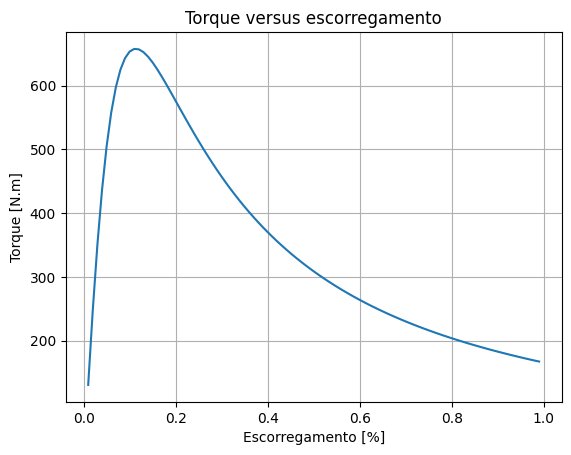

In [8]:
plt.plot(s,t_ind);
plt.title('Torque versus escorregamento')
plt.xlabel('Escorregamento [%]')
plt.ylabel('Torque [N.m]')
plt.grid(True)

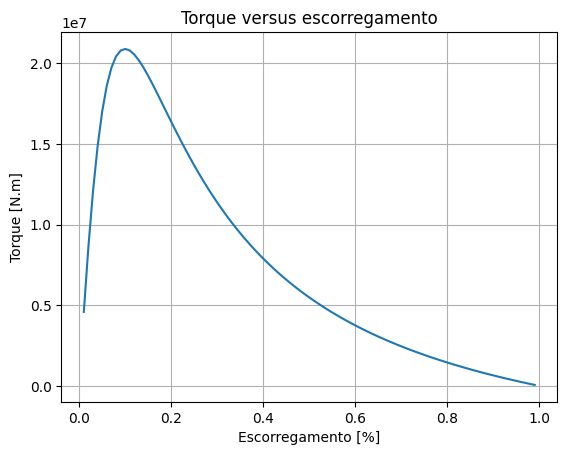

In [9]:
plt.plot(s,t_mec);
plt.title('Torque versus escorregamento')
plt.xlabel('Escorregamento [%]')
plt.ylabel('Torque [N.m]')
plt.grid(True)

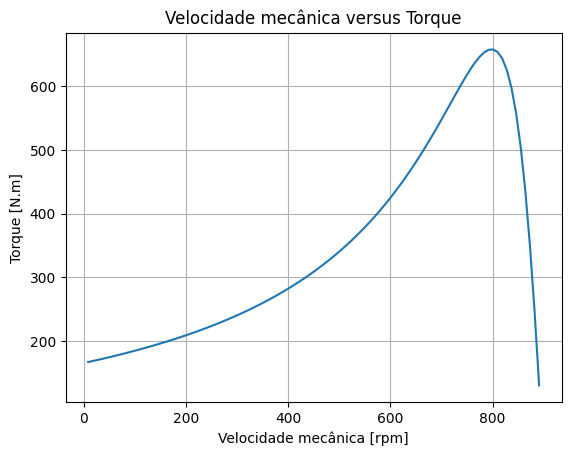

In [10]:
plt.plot(N_mec,t_ind);
plt.title('Velocidade mecânica versus Torque')
plt.xlabel('Velocidade mecânica [rpm]')
plt.ylabel('Torque [N.m]')
plt.grid(True)

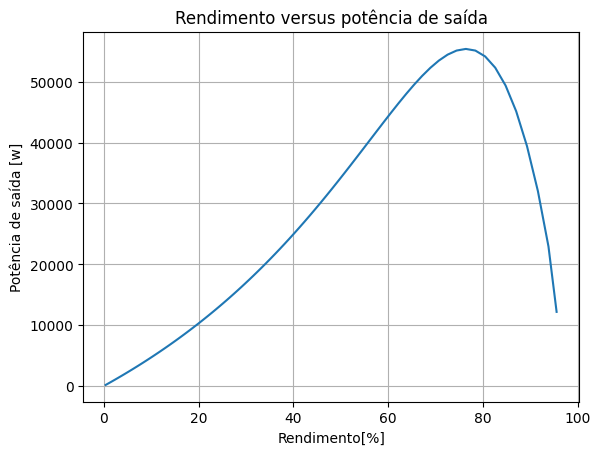

In [11]:


#Rendimento x potência de saída

# No calulo do torque é impossivel considerar s=0, pois da inderteminação
#plt.plot(rendimento,P_mec);
plt.plot(rendimento,P_saida,);
plt.title('Rendimento versus potência de saída')
plt.xlabel('Rendimento[%]')
plt.ylabel('Potência de saída [w]')
plt.grid(True)


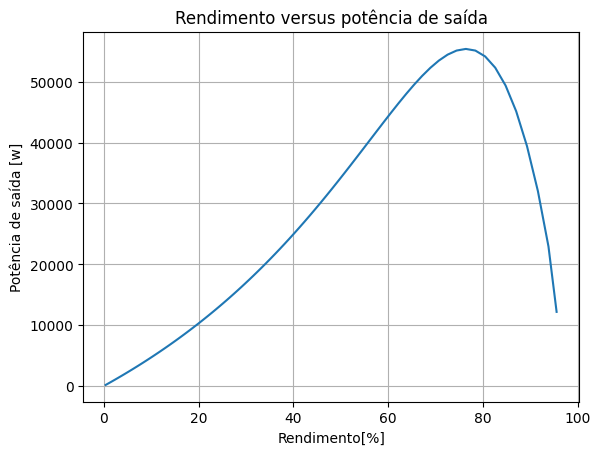

In [12]:
plt.plot(rendimento,P_saida);
plt.title('Rendimento versus potência de saída')
plt.xlabel('Rendimento[%]')
plt.ylabel('Potência de saída [w]')
plt.grid(True)

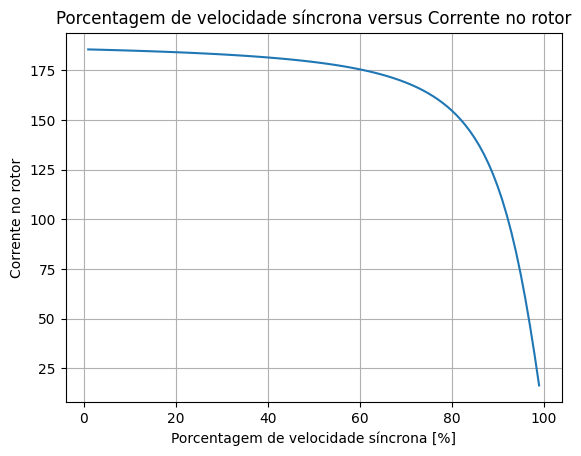

In [13]:


#Testa se vai bater com gráfico da figura 6-11, página 319 do livro do Chapman
plt.plot(((N_mec*100)/N_sinc),i_2_mod);
plt.title('Porcentagem de velocidade síncrona versus Corrente no rotor')
plt.xlabel('Porcentagem de velocidade síncrona [%]')
plt.ylabel('Corrente no rotor')
plt.grid(True)


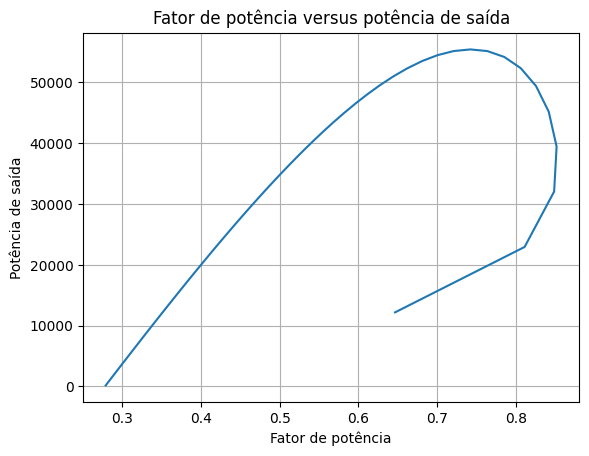

In [14]:

plt.plot(Fator_pot,P_saida);
plt.title('Fator de potência versus potência de saída')
plt.xlabel('Fator de potência')
plt.ylabel('Potência de saída')
plt.grid(True)

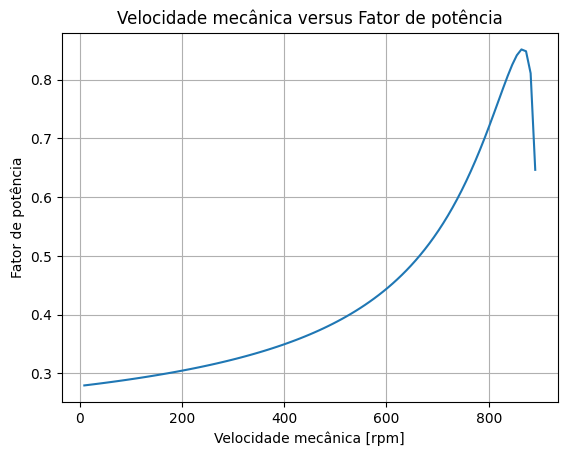

In [15]:
plt.plot(N_mec,Fator_pot);
plt.title('Velocidade mecânica versus Fator de potência')
plt.xlabel('Velocidade mecânica [rpm]')
plt.ylabel('Fator de potência')
plt.grid(True)


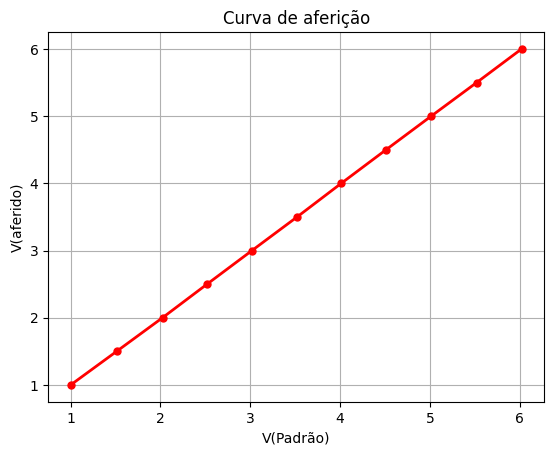

In [16]:
import matplotlib.pyplot as plt

x=[1.001, 1.513, 2.0235, 2.5195, 3.0195, 3.522, 4.0135, 4.5125, 5.015, 5.5215, 6.0215]
y=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

plt.plot(x,y, 'ro-', linewidth=2, markersize=5);
plt.title('Curva de aferição')
plt.xlabel('V(Padrão)')
plt.ylabel('V(aferido)')
plt.grid(True)

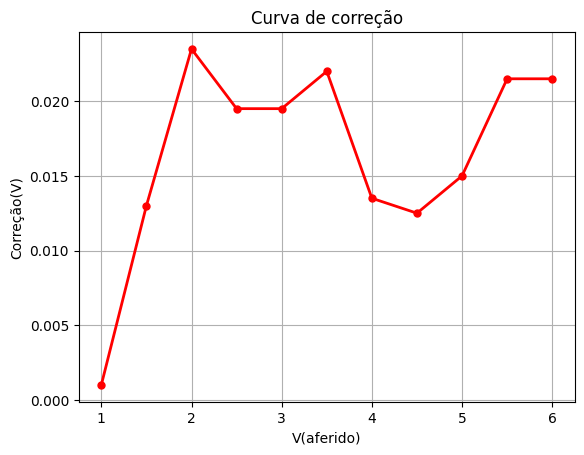

In [17]:
import matplotlib.pyplot as plt

x=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
y=[0.001, 0.013, 0.0235, 0.0195, 0.0195, 0.022, 0.0135, 0.0125, 0.015, 0.0215, 0.0215]

plt.plot(x,y, 'ro-', linewidth=2, markersize=5);
plt.title('Curva de correção')
plt.xlabel('V(aferido)')
plt.ylabel('Correção(V)')
plt.grid(True)